In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By

from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import os

# Replace 'path/to/your/webdriver' with the path to the WebDriver you're using (e.g., chromedriver)


DRIVER_BIN = "/chromedriver"
options = webdriver.ChromeOptions()
service = Service()
target_folder = os.path.join(os.getcwd(), "downloads")
options.add_experimental_option(
    "prefs",
    {
        "download.default_directory": target_folder,
        "download.prompt_for_download": False,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True,
    },
)
options.add_argument("--headless")
driver = webdriver.Chrome(service=service,options=options)


In [28]:

# Go to the PowerSchool login page
driver.get('https://malaysiauadc2023.calicotab.com/uadc2023/tab/team/')
# Wait for the page to load completely
time.sleep(5)

h6_elements = driver.find_elements(By.CSS_SELECTOR, 'div.popover-header.d-flex h6.flex-grow-1')

span_content = driver.find_elements(By.CSS_SELECTOR, 'div.popover-body div.list-group-item span')

In [29]:
element_list = [element.get_attribute('innerHTML') for element in h6_elements]
teammate_list = [element.get_attribute('innerHTML') for element in span_content if not element.get_attribute('innerHTML').startswith("Total")]

In [30]:
school_history = dict()
teams = dict()


In [31]:
def remove_prefix(str, prefix):
    return str.lstrip(prefix)

In [32]:
cur = ""
idx=0
for txt in element_list:
    
    if(txt.startswith("Won") or txt.startswith("Lost")):
        name = remove_prefix(txt, "Won against ")
        name = remove_prefix(name, "Lost against ")
    else:
        name=txt
    teams[name] = teammate_list[idx]
    idx+=1
    if not txt.startswith("Won") and not txt.startswith("Lost"):
        cur = txt
        school_history[cur] = []
    else:
        school_history[cur].append(txt)

        

In [33]:
print(school_history)

{'Ateneo de Manila University 1': ['Won against DTU PSA', 'Won against LUMS A', 'Won against Tokyo A', 'Won against DLSU C', 'Won against Sunway JRS', 'Won against IGNOU A', 'Won against NUS 1', 'Won against NUS 1'], 'UP Diliman A': ['Won against MSU-IIT A', 'Won against IIT KGP A', 'Lost to Sunway JRS', 'Won against BAC 1', 'Won against Binus A', 'Won against DTU DND', 'Won against NUS 2', 'Won against DLSU A'], 'Ateneo de Manila University 2': ['Lost to Mysore TBD', 'Won against BRAC A', 'Won against Ateneo de Manila University 4', 'Won against Malaya 2', 'Won against Ateneo de Manila University 5', 'Won against UP Diliman B', 'Won against IITB NRA', 'Won against Sunway JRS'], 'DTU 7': ['Won against BUTEX A', 'Won against Sunway KAM', 'Lost to DLSU C', 'Won against NTU B', 'Won against Ateneo de Manila University 3', 'Won against LUMS A', 'Won against DLSU A', 'Won against IGNOU A'], 'NUS 1': ['Won against XU - A', 'Won against NSU 1', 'Won against UPLB A', 'Won against Malaya 1', 'W

In [34]:
for i in teams:
    print(i,teams[i])

Ateneo de Manila University 1 Mikko Vitug, David Africa, Tobi Leung
DTU PSA Pranav Gupta, Sarthak Tiwari, Anshuman Singh Malhotra
UMS A Mohammad Huzaifa, Ahmad bin Tahir, Shezreen Shah
Tokyo A Kotaro Yoshida, Nasa Tsuchiya, Yuichi Masaoka
DLSU C Xanthipi Pontejos, Daniel Christopher Haduca, Mezen Lababidi
Sunway JRS Shireen Ali, Jadon Lai, Rohan Subagaran
IGNOU A Nitin Kumar Saidha, Chinmaya Mohan, Ishaan Sengupta
NUS 1 Amy Lee, Cavan Tay, Shaun Lee
UP Diliman A Bea Legaspi, Luigi Alcañeses, Luis Garcia
MSU-IIT A Art Joseph S. Tarranza, Lodelyn A. Prado, Jayvee G. Bondoc
IIT KGP A Abhijna Choodi, Sugandh Sinha, Diya Sarkar
BAC 1 Cyril Joachim (CJ), Ryan Rayner, Chris Chua
Binus A Tengku Omar, Bobby Ongkojoyo, Leonardus Hans Sebastian
DTU DND Himan Nayak, Saatvik Dabral, Shashwat Dash
NUS 2 Ian Dylan Chai, Rdu Dillon, Rachel Chen
DLSU A Ichiro Arbole, Therese Genota, Jill Aycardo
Ateneo de Manila University 2 Riva Fong, Rivaldo Aquino, Bea Cuizon
Mysore TBD Soumitra Tonapi, Debayan Bhat

In [35]:
driver.quit()


In [179]:

class Implementation:
    """
    A class that represents an implementation of the Elo Rating System
    """

    def __init__(self, base_rating=1000):
        """
        Runs at initialization of class object.
        @param base_rating - The rating a new player would have
        """
        self.base_rating = base_rating
        self.players = []

    def __getPlayerList(self):
        """
        Returns this implementation's player list.
        @return - the list of all player objects in the implementation.
        """
        return self.players

    def getPlayer(self, name):
        """
        Returns the player in the implementation with the given name.
        @param name - name of the player to return.
        @return - the player with the given name.
        """
        for player in self.players:
            if player.name == name:
                return player
        return None

    def contains(self, name):
        """
        Returns true if this object contains a player with the given name.
        Otherwise returns false.
        @param name - name to check for.
        """
        for player in self.players:
            if player.name == name:
                return True
        return False

    def addPlayer(self, name, rating=None):
        """
        Adds a new player to the implementation.
        @param name - The name to identify a specific player.
        @param rating - The player's rating.
        """
        if rating == None:
            rating = self.base_rating

        self.players.append(_Player(name=name, rating=rating))

    def removePlayer(self, name):
        """
        Adds a new player to the implementation.
        @param name - The name to identify a specific player.
        """
        self.__getPlayerList().remove(self.getPlayer(name))

    def recordMatch(self, name1, name2, winner=None, draw=False):
        """
        Should be called after a game is played.
        @param name1 - name of the first player.
        @param name2 - name of the second player.
        """
        player1 = self.getPlayer(name1)
        player2 = self.getPlayer(name2)

        expected1 = player1.compareRating(player2)
        expected2 = player2.compareRating(player1)

        k = 64

        rating1 = player1.rating
        rating2 = player2.rating

        if draw:
            score1 = 0.5
            score2 = 0.5
        elif winner == name1:
            score1 = 1.0
            score2 = 0.0
        elif winner == name2:
            score1 = 0.0
            score2 = 1.0
        else:
            raise InputError("One of the names must be the winner or draw must be True")

        newRating1 = rating1 + k * (score1 - expected1)
        newRating2 = rating2 + k * (score2 - expected2)

        if newRating1 < 0:
            newRating1 = 0
            newRating2 = rating2 - rating1

        elif newRating2 < 0:
            newRating2 = 0
            newRating1 = rating1 - rating2

        player1.rating = newRating1
        player2.rating = newRating2
        # return rating1, score1, expected1, rating2, score2, expected2

    def getPlayerRating(self, name):
        """
        Returns the rating of the player with the given name.
        @param name - name of the player.
        @return - the rating of the player with the given name.
        """
        player = self.getPlayer(name)
        return player.rating

    def getRatingList(self):
        """
        Returns a list of tuples in the form of ({name},{rating})
        @return - the list of tuples
        """
        lst = []
        for player in self.__getPlayerList():
            lst.append((player.name, player.rating))
        return lst


class _Player:
    """
    A class to represent a player in the Elo Rating System
    """

    def __init__(self, name, rating):
        """
        Runs at initialization of class object.
        @param name - TODO
        @param rating - TODO
        """
        self.name = name
        self.rating = rating

    def compareRating(self, opponent):
        """
        Compares the two ratings of the this player and the opponent.
        @param opponent - the player to compare against.
        @returns - The expected score between the two players.
        """
        return (1 + 10 ** ((opponent.rating - self.rating) / 400.0)) ** -1


In [180]:
# start with school_history which has list of teams and matchups
# teammate_list = list of teammates

r = Implementation()

In [181]:
for name,ppl in teams.items():
    r.addPlayer(name,1000)

In [182]:
r.getRatingList()

[('Ateneo de Manila University 1', 1000),
 ('DTU PSA', 1000),
 ('UMS A', 1000),
 ('Tokyo A', 1000),
 ('DLSU C', 1000),
 ('Sunway JRS', 1000),
 ('IGNOU A', 1000),
 ('NUS 1', 1000),
 ('UP Diliman A', 1000),
 ('MSU-IIT A', 1000),
 ('IIT KGP A', 1000),
 ('BAC 1', 1000),
 ('Binus A', 1000),
 ('DTU DND', 1000),
 ('NUS 2', 1000),
 ('DLSU A', 1000),
 ('Ateneo de Manila University 2', 1000),
 ('Mysore TBD', 1000),
 ('BRAC A', 1000),
 ('Ateneo de Manila University 4', 1000),
 ('Malaya 2', 1000),
 ('Ateneo de Manila University 5', 1000),
 ('UP Diliman B', 1000),
 ('IITB NRA', 1000),
 ('DTU 7', 1000),
 ('BUTEX A', 1000),
 ('Sunway KAM', 1000),
 ('NTU B', 1000),
 ('Ateneo de Manila University 3', 1000),
 ('XU - A', 1000),
 ('NSU 1', 1000),
 ('UPLB A', 1000),
 ('Malaya 1', 1000),
 ('UPD C', 1000),
 ('UPLB C', 1000),
 ('SMU B', 1000),
 ('DTU MDK', 1000),
 ('VIT A', 1000),
 ('UT MARA B', 1000),
 ('Sunway VRT', 1000),
 ('NSUT F', 1000),
 ('NTU 1', 1000),
 ('SBU A', 1000),
 ('UT MARA C', 1000),
 ('GNLU'

round 1 done
[('Ateneo de Manila University 1', 1058.1711618358436), ('DTU PSA', 941.8288381641564), ('UMS A', 1029.060996942049), ('Tokyo A', 1058.1711618358436), ('DLSU C', 1058.1711618358436), ('Sunway JRS', 1058.1711618358436), ('IGNOU A', 1058.1711618358436), ('NUS 1', 1058.1711618358436), ('UP Diliman A', 1058.1711618358436), ('MSU-IIT A', 941.8288381641564), ('IIT KGP A', 1058.1711618358436), ('BAC 1', 1058.1711618358436), ('Binus A', 1058.1711618358436), ('DTU DND', 1058.1711618358436), ('NUS 2', 1058.1711618358436), ('DLSU A', 1058.1711618358436), ('Ateneo de Manila University 2', 941.8288381641564), ('Mysore TBD', 1058.1711618358436), ('BRAC A', 941.8288381641564), ('Ateneo de Manila University 4', 1058.1711618358436), ('Malaya 2', 941.8288381641564), ('Ateneo de Manila University 5', 1058.1711618358436), ('UP Diliman B', 941.8288381641564), ('IITB NRA', 1058.1711618358436), ('DTU 7', 1058.1711618358436), ('BUTEX A', 941.8288381641564), ('Sunway KAM', 1058.1711618358436), ('N

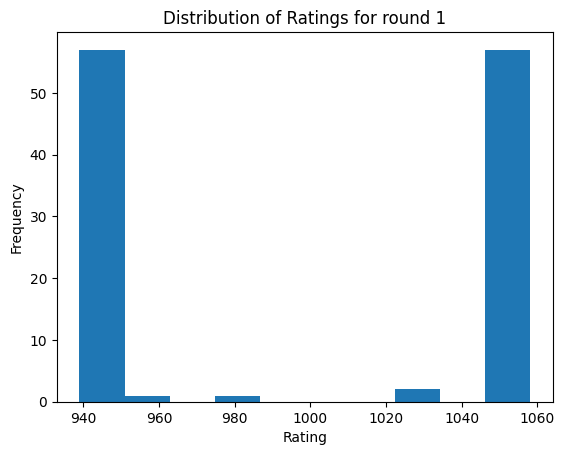

round 2 done
[('Ateneo de Manila University 1', 1114.4279089541324), ('DTU PSA', 920.9659290091115), ('UMS A', 999.7358858467841), ('Tokyo A', 1116.3423236716872), ('DLSU C', 1116.3423236716872), ('Sunway JRS', 1116.3423236716872), ('IGNOU A', 1116.3423236716872), ('NUS 1', 1116.3423236716872), ('UP Diliman A', 1116.3423236716872), ('MSU-IIT A', 1000.0), ('IIT KGP A', 1000.0), ('BAC 1', 1000.0), ('Binus A', 1116.3423236716872), ('DTU DND', 1116.3423236716872), ('NUS 2', 1116.3423236716872), ('DLSU A', 1116.3423236716872), ('Ateneo de Manila University 2', 1000.0), ('Mysore TBD', 1116.3423236716872), ('BRAC A', 883.6576763283128), ('Ateneo de Manila University 4', 1116.3423236716872), ('Malaya 2', 1000.0), ('Ateneo de Manila University 5', 1116.3423236716872), ('UP Diliman B', 1000.0), ('IITB NRA', 1116.3423236716872), ('DTU 7', 1116.3423236716872), ('BUTEX A', 1000.0), ('Sunway KAM', 1000.0), ('NTU B', 1000.0), ('Ateneo de Manila University 3', 1116.3423236716872), ('XU - A', 1000.0), 

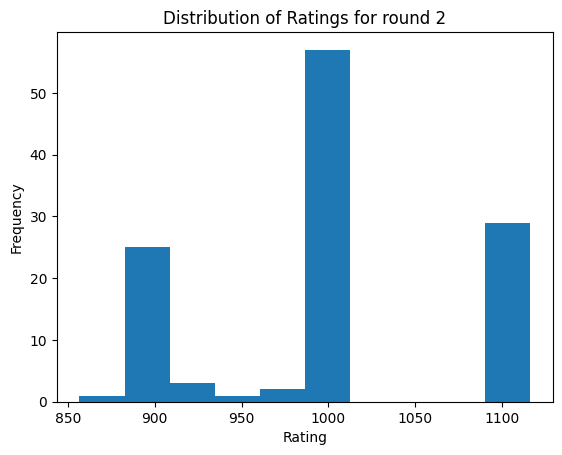

round 3 done
[('Ateneo de Manila University 1', 1172.9145778624834), ('DTU PSA', 951.4523870699255), ('UMS A', 1028.8636456255088), ('Tokyo A', 1057.8556547633361), ('DLSU C', 1174.5134855075307), ('Sunway JRS', 1174.5134855075307), ('IGNOU A', 1174.5134855075307), ('NUS 1', 1174.5134855075307), ('UP Diliman A', 1058.1711618358436), ('MSU-IIT A', 1058.1711618358436), ('IIT KGP A', 1058.1711618358436), ('BAC 1', 1058.1711618358436), ('Binus A', 1174.5134855075307), ('DTU DND', 1058.1711618358436), ('NUS 2', 1058.1711618358436), ('DLSU A', 1174.5134855075307), ('Ateneo de Manila University 2', 1077.2417807490356), ('Mysore TBD', 1174.5134855075307), ('BRAC A', 941.8288381641564), ('Ateneo de Manila University 4', 1039.1005429226516), ('Malaya 2', 1058.1711618358436), ('Ateneo de Manila University 5', 1058.1711618358436), ('UP Diliman B', 1058.1711618358436), ('IITB NRA', 1058.1711618358436), ('DTU 7', 1058.1711618358436), ('BUTEX A', 941.8288381641564), ('Sunway KAM', 941.8288381641564),

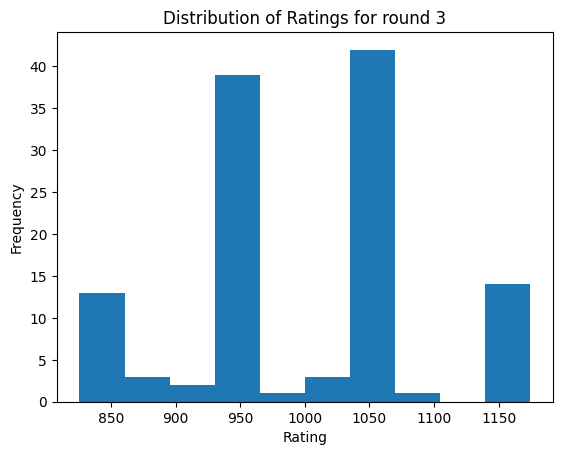

round 4 done
[('Ateneo de Manila University 1', 1231.3492342157108), ('DTU PSA', 892.5435729517385), ('UMS A', 1063.5565833924225), ('Tokyo A', 996.7208507428169), ('DLSU C', 1116.0788291543033), ('Sunway JRS', 1232.6846473433743), ('IGNOU A', 1232.6846473433743), ('NUS 1', 1232.6846473433743), ('UP Diliman A', 1116.3423236716872), ('MSU-IIT A', 1000.0), ('IIT KGP A', 1116.3423236716872), ('BAC 1', 1000.0), ('Binus A', 1232.6846473433743), ('DTU DND', 1116.3423236716872), ('NUS 2', 1116.3423236716872), ('DLSU A', 1232.6846473433743), ('Ateneo de Manila University 2', 1132.2846734827574), ('Mysore TBD', 1116.3423236716872), ('BRAC A', 1000.0), ('Ateneo de Manila University 4', 1100.422554915176), ('Malaya 2', 1003.1282691021219), ('Ateneo de Manila University 5', 1116.3423236716872), ('UP Diliman B', 1116.3423236716872), ('IITB NRA', 1116.3423236716872), ('DTU 7', 1116.3423236716872), ('BUTEX A', 1000.0), ('Sunway KAM', 1000.0), ('NTU B', 1000.0), ('Ateneo de Manila University 3', 1116.

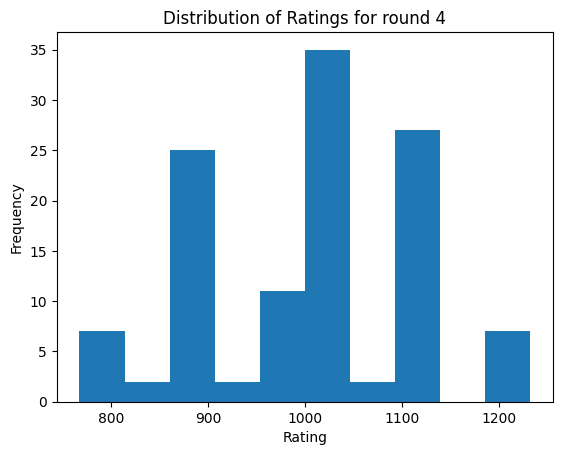

round 5 done
[('Ateneo de Manila University 1', 1289.7404569801072), ('DTU PSA', 832.7862542548124), ('UMS A', 1100.368398748144), ('Tokyo A', 957.2797862976389), ('DLSU C', 1174.2934032695662), ('Sunway JRS', 1174.293424578978), ('IGNOU A', 1290.8558091792179), ('NUS 1', 1290.8558091792179), ('UP Diliman A', 1193.5841044207227), ('MSU-IIT A', 1058.1711618358436), ('IIT KGP A', 1058.1711618358436), ('BAC 1', 1058.1711618358436), ('Binus A', 1155.4428665943387), ('DTU DND', 1155.7833881168651), ('NUS 2', 1174.5134855075307), ('DLSU A', 1174.5134855075307), ('Ateneo de Manila University 2', 1187.8385946474552), ('Mysore TBD', 1058.1711618358436), ('BRAC A', 941.8288381641564), ('Ateneo de Manila University 4', 1044.8649415571526), ('Malaya 2', 1060.784369773738), ('Ateneo de Manila University 5', 1060.7884025069893), ('UP Diliman B', 1174.1325921899213), ('IITB NRA', 1174.5134855075307), ('DTU 7', 1174.5134855075307), ('BUTEX A', 1059.1427605134916), ('Sunway KAM', 1059.7592033156836), (

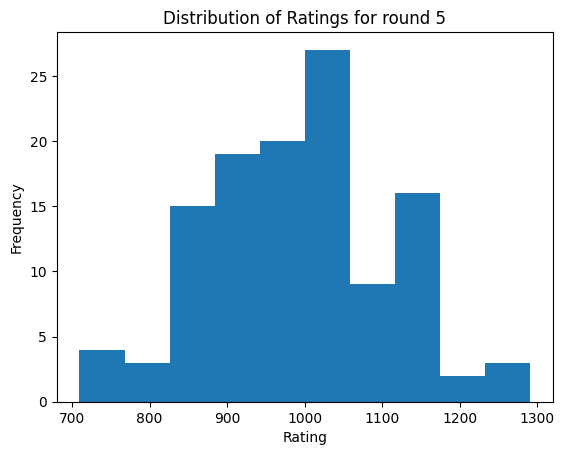

round 6 done
[('Ateneo de Manila University 1', 1348.0954087730024), ('DTU PSA', 775.8083601001238), ('UMS A', 1075.0955980106949), ('Tokyo A', 1011.9703133209089), ('DLSU C', 1232.500824659829), ('Sunway JRS', 1230.403151955362), ('IGNOU A', 1232.5008573863227), ('NUS 1', 1328.0511394245273), ('UP Diliman A', 1245.5896671577962), ('MSU-IIT A', 1116.7730500867983), ('IIT KGP A', 1000.0230808388449), ('BAC 1', 1000.0), ('Binus A', 1118.2475363490294), ('DTU DND', 1103.7778253797917), ('NUS 2', 1232.6846473433743), ('DLSU A', 1232.2542892196516), ('Ateneo de Manila University 2', 1243.758405009478), ('Mysore TBD', 1116.6040269641446), ('BRAC A', 999.2958394610371), ('Ateneo de Manila University 4', 1104.1233517217217), ('Malaya 2', 1002.1824815227834), ('Ateneo de Manila University 5', 1002.1858492442204), ('UP Diliman B', 1118.2127818278984), ('IITB NRA', 1232.6892004793715), ('DTU 7', 1222.8825437473397), ('BUTEX A', 1000.811500955756), ('Sunway KAM', 1001.3263381873827), ('NTU B', 883

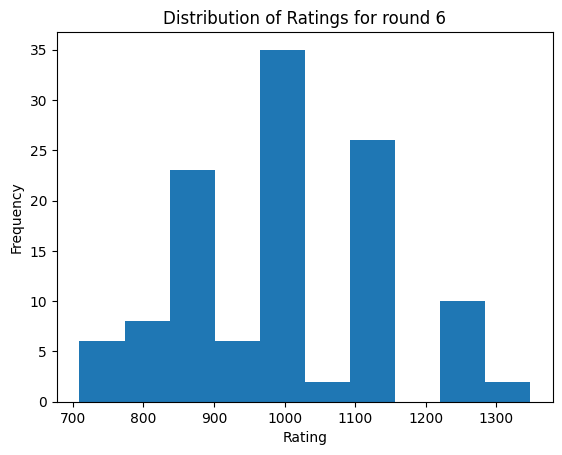

round 7 done
[('Ateneo de Manila University 1', 1402.9794434685762), ('DTU PSA', 743.822498015114), ('UMS A', 1046.7211107566782), ('Tokyo A', 1068.913689319514), ('DLSU C', 1173.9839422961927), ('Sunway JRS', 1288.9200343189984), ('IGNOU A', 1290.7022992511054), ('NUS 1', 1273.1671047289535), ('UP Diliman A', 1301.6406358566978), ('MSU-IIT A', 1056.763918590357), ('IIT KGP A', 1058.2264220431061), ('BAC 1', 941.9624661504297), ('Binus A', 1059.7816776830616), ('DTU DND', 1164.0270277210439), ('NUS 2', 1176.6336786444726), ('DLSU A', 1172.5366960717704), ('Ateneo de Manila University 2', 1300.1101926359722), ('Mysore TBD', 1174.865694279747), ('BRAC A', 941.3743069220978), ('Ateneo de Manila University 4', 1028.8586146033665), ('Malaya 2', 1060.1152130500636), ('Ateneo de Manila University 5', 1060.2071473898889), ('UP Diliman B', 1175.9550201647678), ('IITB NRA', 1176.3374128528774), ('DTU 7', 1282.6001368952209), ('BUTEX A', 1058.733033494695), ('Sunway KAM', 1059.4613725121542), ('N

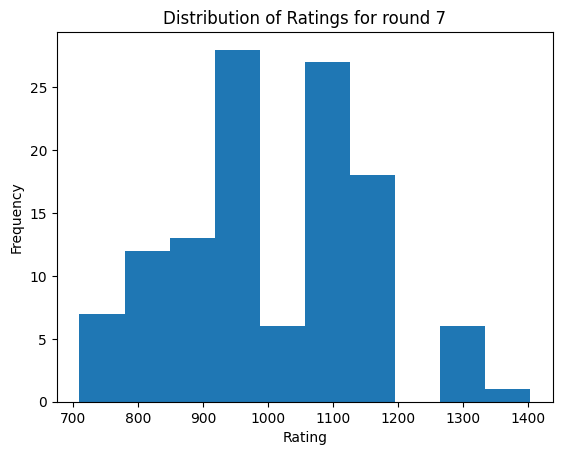

round 8 done
[('Ateneo de Manila University 1', 1440.9634218076471), ('DTU PSA', 743.822498015114), ('UMS A', 1015.7766041299358), ('Tokyo A', 1125.082512349266), ('DLSU C', 1115.9580227316121), ('Sunway JRS', 1232.588075158998), ('IGNOU A', 1231.1944602275196), ('NUS 1', 1235.1831263898825), ('UP Diliman A', 1339.724988030586), ('MSU-IIT A', 1001.6541242217279), ('IIT KGP A', 1000.5229039839743), ('BAC 1', 901.7282485995571), ('Binus A', 1117.5808503297471), ('DTU DND', 1205.2117041721422), ('NUS 2', 1232.998919732935), ('DLSU A', 1134.4523438978824), ('Ateneo de Manila University 2', 1356.4421517959727), ('Mysore TBD', 1232.8916138443276), ('BRAC A', 885.1436680898026), ('Ateneo de Manila University 4', 975.6309125376464), ('Malaya 2', 1001.8723812851388), ('Ateneo de Manila University 5', 1001.6999011185977), ('UP Diliman B', 1233.8837722001742), ('IITB NRA', 1117.8994225601937), ('DTU 7', 1342.1079759188065), ('BUTEX A', 1000.5880043990403), ('Sunway KAM', 998.9137909250134), ('NTU

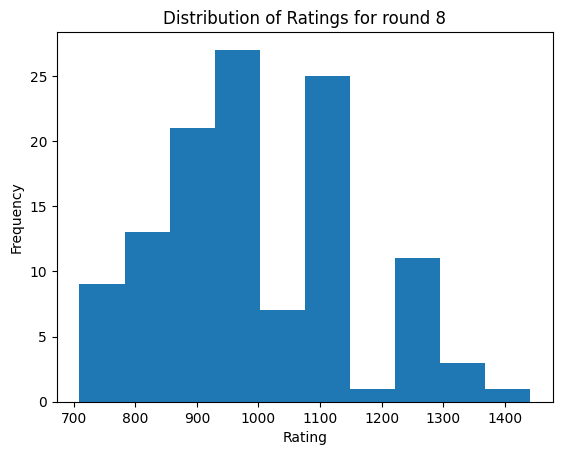

In [183]:
import matplotlib.pyplot as plt

for name,matches in school_history.items():
    rounds = len(matches)
    break
for i in range(rounds):
    try:
        for name,matches in school_history.items():
            opp = matches[i]
            opp = remove_prefix(opp, "Won against ")
            opp = remove_prefix(opp, "Lost against ")
            if matches[i].startswith("Won"):
                r.recordMatch(name,opp,winner=name)
            else:
                r.recordMatch(name,opp,winner=opp)
    except:
        pass
    print(f"round {i+1} done")
    print(r.getRatingList())

    ratings = r.getRatingList()
    rating_values = [rating[1] for rating in ratings]

    plt.hist(rating_values, bins=10)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Ratings for round ' + str(i+1))
    plt.show()
        

In [184]:
rank_list = sorted(r.getRatingList(), key=lambda x: x[1], reverse=True)
for rank in rank_list:
    print(rank[0], rank[1])


Ateneo de Manila University 1 1440.9634218076471
Ateneo de Manila University 2 1356.4421517959727
DTU 7 1342.1079759188065
UP Diliman A 1339.724988030586
NSU 1 1242.0571284943596
NUS 1 1235.1831263898825
UP Diliman B 1233.8837722001742
Sunway VRT 1233.1562708291642
NUS 2 1232.998919732935
Mysore TBD 1232.8916138443276
Sunway JRS 1232.588075158998
DCAC 1232.3843565352797
NTU A 1232.1266199551278
IGNOU A 1231.1944602275196
UT MARA A 1231.030949631995
DTU DND 1205.2117041721422
DLSU A 1134.4523438978824
Ateneo de Manila University 3 1130.5344611320772
Tokyo A 1125.082512349266
UPLB B 1118.7700513523803
UPD C 1118.247732557577
XU - A 1118.1809444365315
GNLU 1117.9230520568824
IITB NRA 1117.8994225601937
Tokyo B 1117.8863754250988
MSU-IIT B 1117.6657420935428
Binus A 1117.5808503297471
SBU A 1117.0366900900458
BUP A 1116.8580019270873
Ateneo de Manila University 6 1116.6751668378292
DTU MDK 1116.5544534431847
UT MARA B 1116.3202034596316
DLSU C 1115.9580227316121
Malaya 1 1114.8192444807196